# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

¡Bienvenidos al primer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.

Vamos a enfocarnos en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero debemos limpiar un poco el dataset.

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

## Los atributos
A continuación vamos a describir los atributos que consideramos en esta muestra:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


<font color = "green">
Versiones de Data Frame a lo largo del Notebook. Se consensuó trabajar en cada ítem con el último df modificado  

DF original  
a partir de 4 ) df_filtered filtado por tipo de propiedad apartment, house y PH  
a partir de 6 ) df_filtered filtado por datos no nulos en los campos superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado  
a partir de 9 ) df_filtered modificado para que siempre superficie total >= superficie cubierta  
a partir de 9 ) df_filtered filtrado para corrdenadas que se repiten menos de 5 veces  
a partir de 11 ) df_filtered filtrado para valor price_usd_per_m2 dentro del rango percentil [p10,p90]  
a partir de 12 ) df_filtered filtrado para datos existentes del barrio publicado  
</font>

## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las bibliotecas numpy, pandas, matplotlib.pylab y seaborn. 

** 1) Importá ** cada una de ellas con los siguientes nombres: 
- **numpy** como **np**
- **pandas** como **pd**
- **matplotlib.pylab** como **plt**
- **seaborn** como **sns**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Cargando dataset de propiedades

**2) Cargá** el dataset que se encuentra en la carpeta *dataset/* y guardalo en una variable llamada **df**. 
No te olvides de utilizar **parse_dates** sobre la columna **created_on**


In [3]:
df = pd.read_csv('datos_properati.csv', parse_dates =['created_on'])
df.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


## Exploración de datos

Lo primero que vamos a hacer es ver qué forma tiene el dataset que acabamos de cargar. Para eso vamos a mostrar las primeras 3 entradas del mismo y utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [4]:
df.shape

(18979, 17)

In [5]:
# Verificación del tipo de dato created_on y demás columnas
df.dtypes

created_on                 datetime64[ns]
operation                          object
property_type                      object
place_with_parent_names            object
lat-lon                            object
lat                               float64
lon                               float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
floor                             float64
rooms                             float64
expenses                          float64
properati_url                      object
barrio                             object
comuna                            float64
dtype: object

In [6]:
df.info() # Observación de datos faltantes por atributo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 18979 non-null datetime64[ns]
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: datetime64[ns](1), float64(10), ob

## Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

**3) Mostrá** las categorías de `property_type` y cuántas instancias hay de cada una.

Recordá utilizar funciones del **dataframe** de pandas para realizar esto.

In [7]:
# mostrá las categorías del campo property_type y mostrá la cant. de valores en esta celda
df.property_type.unique()

array(['house', 'store', 'apartment', 'PH'], dtype=object)

In [8]:
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

El atributo property_type lo tienen todas las instancias

### Filtrando las categorías

De las categorías existentes sólo queremos quedarnos con las que sean casas (house), departamentos (apartment) o PH (PH). 

Para esto, 

**4) filtrá** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguirás usando a lo largo del análisis.


In [9]:
filtro_property_type = (df['property_type']=='apartment') | (df['property_type']=='house')|(df['property_type']=='PH')
df_filtered = df[filtro_property_type] 
df_filtered.property_type.unique()
#df_filtered.head(10)

array(['house', 'apartment', 'PH'], dtype=object)

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17888 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 17888 non-null datetime64[ns]
operation                  17888 non-null object
property_type              17888 non-null object
place_with_parent_names    17888 non-null object
lat-lon                    17888 non-null object
lat                        17888 non-null float64
lon                        17888 non-null float64
price_aprox_usd            16511 non-null float64
surface_total_in_m2        15691 non-null float64
surface_covered_in_m2      15968 non-null float64
price_usd_per_m2           15207 non-null float64
floor                      2720 non-null float64
rooms                      13407 non-null float64
expenses                   3698 non-null float64
properati_url              17888 non-null object
barrio                     17888 non-null object
comuna                     17888 non-null float64
dtypes: datetime64[ns](1), float64(10), ob

### Visualizando las categorías
**5)** Utilizando `seaborn` **creá un countplot** para visualizar las categorías de `df_filtered` en el campo `property_type` 

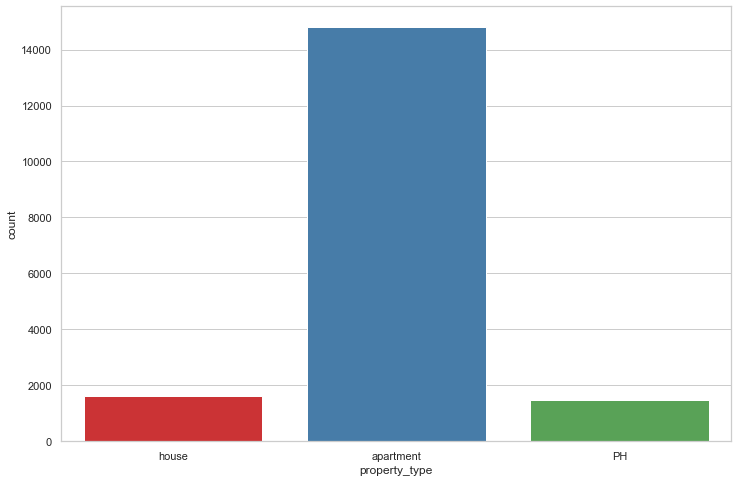

In [11]:
sns.set(style="whitegrid")
ax = sns.countplot(x="property_type",linewidth=1, palette="Set1", data=df_filtered)

## Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.

**6) Quitá** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

<font color='green'> Nuevo data frame **df_filtered** que filtra sólo las instancias donde no estan vacíos ninguno de los campos superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado</font>  

In [12]:
num_inicial_instancias =df_filtered.shape[0]  #numero de filas en df_filtered antes de limpiar por valores nulos
df_filtered = df_filtered.dropna(subset = ["surface_total_in_m2","surface_covered_in_m2","rooms","price_aprox_usd","price_usd_per_m2"])
df_filtered.head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.0,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0


**7)** A continuación **mostrá** cuantas instancias son las que descartaste a partir de quitar las que tenían valores nulos.

In [13]:
df_filtered.shape[0] #numero de filas en df_filtered despues de limpiar por valores nulos


11975

In [14]:
num_inicial_instancias-df_filtered.shape[0] # filas eliminadas

5913

Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

**8) Mostrá** qué otros atributos tienen valores faltantes en el `dataframe`.

In [15]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11975 entries, 18 to 18978
Data columns (total 17 columns):
created_on                 11975 non-null datetime64[ns]
operation                  11975 non-null object
property_type              11975 non-null object
place_with_parent_names    11975 non-null object
lat-lon                    11975 non-null object
lat                        11975 non-null float64
lon                        11975 non-null float64
price_aprox_usd            11975 non-null float64
surface_total_in_m2        11975 non-null float64
surface_covered_in_m2      11975 non-null float64
price_usd_per_m2           11975 non-null float64
floor                      1863 non-null float64
rooms                      11975 non-null float64
expenses                   2272 non-null float64
properati_url              11975 non-null object
barrio                     11975 non-null object
comuna                     11975 non-null float64
dtypes: datetime64[ns](1), float64(10), o

In [16]:
df_filtered.isna().sum()[df_filtered.isna().sum()>0] # otra forma de ver que cuantos datos faltantes por atributo hay

floor       10112
expenses     9703
dtype: int64

#### Desafío: planteá alguna estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`.

<font color='green'>Con el data frame filtrado se dividen las propiedades según el tipo (house, apartment, y PH)  y zonas (formadas a partir de agrupar barrios vecinos). Con cada uno de estos conjuntos, caracterizados por tipo de propiedad y zona, se hace un scatter de **surface_total_in_m2 vs precio** y se busca una curva de ajuste a ese scatter (y = f(x)). Luego para cada propiedad con el dato faltante surface_total_in_m2 se busca el dato según las siguientes estrategias: </font>  
<font color='green'>  
1_ Si existe el precio, se encuentra el dato a través de la función de ajuste que le corresponda (según tipo de propiedad y barrio) verificando la condición que la superficie total no sea menor que la sup. cubierta.  
2_ Si no existe el precio ó falló la condición de la estrategia 1 se asigna  surface_total_in_m2 = surface_covered_in_m2 si es que el dato de superficie cubierta existe.  
3_ Si fallan las dos estrategias anteriores se elimina la fila ya en la propiedad faltan muchos datos de relevancia.</font>    




## Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 

Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

**9) Mostrá** cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada `wrong_surface_rows`

In [17]:
wrong_surface_rows = df_filtered[df_filtered.surface_total_in_m2 <df_filtered.surface_covered_in_m2]
wrong_surface_rows.shape[0]

73

In [18]:
wrong_surface_rows.loc[153,["surface_total_in_m2","surface_covered_in_m2"]] # prueba en uno de los casos

surface_total_in_m2      39
surface_covered_in_m2    44
Name: 153, dtype: object

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [19]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

In [20]:
df_filtered.loc[153,["surface_total_in_m2","surface_covered_in_m2"]] # prueba en uno de los casos

surface_total_in_m2      44
surface_covered_in_m2    39
Name: 153, dtype: object

Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [21]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False)

lat         lon       
-34.589546  -58.397364    149
-34.571150  -58.423297    118
-34.562084  -58.456686     77
-34.620928  -58.445874     45
-34.609821  -58.392606     36
                         ... 
-34.590998  -58.394888      2
-34.591283  -58.436682      2
-34.591406  -58.388358      2
-34.591479  -58.404996      2
-34.694841  -58.470328      2
Length: 1055, dtype: int64

In [22]:
#verificación en uno de los casos
df_filtered[(df_filtered.lat < -34.6037)&(df_filtered.lat > -34.6038)&(df_filtered.lon < -58.4932)&(df_filtered.lon > -58.4933)] 

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18437,2017-09-25,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,164198.0,56.0,56.0,2932.107143,7.0,2.0,NaN,https://www.properati.com.ar/1fe1s_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18440,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,146100.0,54.0,46.0,2705.555556,3.0,2.0,NaN,https://www.properati.com.ar/1fkvi_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18441,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,155700.0,56.0,47.0,2780.357143,4.0,2.0,NaN,https://www.properati.com.ar/1fkvj_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18443,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,154200.0,54.0,46.0,2855.555556,6.0,2.0,NaN,https://www.properati.com.ar/1fkvn_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18444,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,158500.0,56.0,47.0,2830.357143,5.0,2.0,NaN,https://www.properati.com.ar/1fkvo_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18447,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,161300.0,56.0,47.0,2880.357143,6.0,2.0,NaN,https://www.properati.com.ar/1fkvt_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18449,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,151500.0,54.0,46.0,2805.555556,5.0,2.0,NaN,https://www.properati.com.ar/1fkvx_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0
18450,2017-09-28,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.603770167,-58.4932179167",-34.60377,-58.493218,156900.0,54.0,46.0,2905.555556,7.0,2.0,NaN,https://www.properati.com.ar/1fkvy_venta_departamento_villa-del-parque_nogoya_3200_balcon_jardin_piscina_toilette_garage_placard_aire-acondicionado_re-max-premium-ii,VILLA DEL PARQUE,11.0


Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [23]:
conteo_puntos.name = 'conteo'

<font color='green'> Nueva modificación en el data frame **df_filtered** que filtra solo las instancias donde **conteo <= 5**  </font> 

In [24]:
df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

In [25]:
df_filtered = df_filtered[df_filtered.conteo <= 5]

In [26]:
df_filtered[df_filtered.conteo>1].head(5)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,conteo
37,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.570648,-58.433619",-34.570648,-58.433619,159800.0,47.0,47.0,3400.000000,2.0,1.0,NaN,https://www.properati.com.ar/1e4tm_venta_departamento_palermo_balcon_luminoso_estrenar_subte-linea-d_re-max-d-bosion,PALERMO,14.0,3
38,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.570648,-58.433619",-34.570648,-58.433619,144400.0,38.0,38.0,3800.000000,2.0,1.0,NaN,https://www.properati.com.ar/1e4tp_venta_departamento_palermo_balcon_luminoso_estrenar_subte-linea-d_re-max-d-bosion,PALERMO,14.0,3
39,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.570648,-58.433619",-34.570648,-58.433619,169000.0,52.0,47.0,3250.000000,2.0,1.0,NaN,https://www.properati.com.ar/1e4tr_venta_departamento_palermo_balcon_luminoso_estrenar_subte-linea-d_re-max-d-bosion,PALERMO,14.0,3
46,2017-09-02,sell,apartment,|Argentina|Capital Federal|Las Cañitas|,"-34.5708701,-58.4331449",-34.570870,-58.433145,440000.0,80.0,76.0,5500.000000,NaN,3.0,NaN,https://www.properati.com.ar/1e9gr_venta_departamento_las-canitas_balcon_baulera_suite_gimnasio_lavadero_parrilla_patio_piscina_quincho_sum_sauna_lujoso_garage_amenities_subte-linea-d_l-e-group,PALERMO,14.0,2
47,2017-09-02,sell,apartment,|Argentina|Capital Federal|Las Cañitas|,"-34.5708701,-58.4331449",-34.570870,-58.433145,550000.0,98.0,95.0,5612.244898,NaN,4.0,NaN,https://www.properati.com.ar/1e9i0_venta_departamento_las-canitas_gimnasio_patio_piscina_sauna_lujoso_garage_amenities_subte-linea-d_l-e-group,PALERMO,14.0,2


In [27]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10523 entries, 18 to 18978
Data columns (total 18 columns):
created_on                 10523 non-null datetime64[ns]
operation                  10523 non-null object
property_type              10523 non-null object
place_with_parent_names    10523 non-null object
lat-lon                    10523 non-null object
lat                        10523 non-null float64
lon                        10523 non-null float64
price_aprox_usd            10523 non-null float64
surface_total_in_m2        10523 non-null float64
surface_covered_in_m2      10523 non-null float64
price_usd_per_m2           10523 non-null float64
floor                      1639 non-null float64
rooms                      10523 non-null float64
expenses                   2224 non-null float64
properati_url              10523 non-null object
barrio                     10523 non-null object
comuna                     10523 non-null float64
conteo                     10523 non-null

Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [28]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [29]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count()
total_propiedades.sort_values()

barrio
VILLA RIACHUELO         9
VILLA SOLDATI          11
VILLA REAL             28
AGRONOMIA              35
NUEVA POMPEYA          36
VERSALLES              45
VILLA SANTA RITA       47
PARQUE CHAS            60
PARQUE PATRICIOS       66
VILLA LUGANO           66
PATERNAL               66
PARQUE AVELLANEDA      66
VELEZ SARSFIELD        72
COGHLAN                76
VILLA LURO             78
VILLA GRAL. MITRE      79
MATADEROS              80
MONTE CASTRO           81
VILLA PUEYRREDON       83
FLORESTA               91
BOEDO                  91
BOCA                   94
VILLA ORTUZAR         107
VILLA DEL PARQUE      108
PARQUE CHACABUCO      113
CHACARITA             114
LINIERS               120
SAN TELMO             123
SAN CRISTOBAL         124
BARRACAS              136
CONSTITUCION          152
SAAVEDRA              178
VILLA DEVOTO          184
COLEGIALES            190
MONSERRAT             196
PUERTO MADERO         210
SAN NICOLAS           273
NUEZ                  273
VILLA

In [30]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios.head(50)

barrio
AGRONOMIA            0.542857
ALMAGRO              0.868750
BALVANERA            0.922939
BARRACAS             0.676471
BELGRANO             0.952446
BOCA                 0.765957
BOEDO                0.582418
CABALLITO            0.859829
CHACARITA            0.763158
COGHLAN              0.723684
COLEGIALES           0.852632
CONSTITUCION         0.796053
FLORES               0.799555
FLORESTA             0.758242
LINIERS              0.633333
MATADEROS            0.387500
MONSERRAT            0.938776
MONTE CASTRO         0.530864
NUEVA POMPEYA        0.527778
NUEZ                 0.835165
PALERMO              0.936836
PARQUE AVELLANEDA    0.439394
PARQUE CHACABUCO     0.548673
PARQUE CHAS          0.850000
PARQUE PATRICIOS     0.636364
PATERNAL             0.621212
PUERTO MADERO        0.995238
RECOLETA             0.987342
RETIRO               0.992647
SAAVEDRA             0.685393
SAN CRISTOBAL        0.814516
SAN NICOLAS          0.989011
SAN TELMO            0.853659
VEL

In [31]:
porcentaje_casas_ph.head(5)

barrio
AGRONOMIA    0.457143
ALMAGRO      0.131250
BALVANERA    0.077061
BARRACAS     0.323529
BELGRANO     0.047554
Name: property_type, dtype: float64

In [32]:
print("Barrios con mayor porcentaje de edificios: \n\n", porcentaje_edificios.sort_values()[::-1][:5])
print("\n")
print("Barrios con mayor porcentaje de casas y phs: \n\n ", porcentaje_casas_ph.sort_values()[::-1][:5])


Barrios con mayor porcentaje de edificios: 

 barrio
PUERTO MADERO    0.995238
RETIRO           0.992647
SAN NICOLAS      0.989011
RECOLETA         0.987342
BELGRANO         0.952446
Name: property_type, dtype: float64


Barrios con mayor porcentaje de casas y phs: 

  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

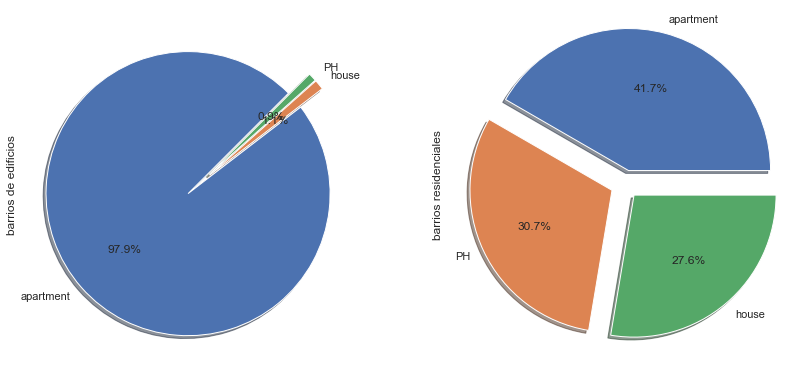

In [33]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index # máscara para seleccionar los 5 barrios que entre sus prop tienen mayor porcentaje de edificios
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index # máscara para seleccionar los 5 barrios que entre sus prop tienen mayor porcentaje de casas o ph
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie',explode = (0.1, 0.1, 0.1),shadow = True, label = "barrios de edificios",startangle=45, ax=axs[0],autopct='%1.1f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie',explode = (0.1, 0.1, 0.1),shadow = True,label = "barrios residenciales", ax=axs[1],autopct='%1.1f%%')

<font color=green>Distribución porcentual de tipo de propiedad en la zona de más departamentos</font>

In [34]:
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts()/df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().sum()*100

apartment    97.927656
house         1.130369
PH            0.941974
Name: property_type, dtype: float64

<font color=green>Distribución porcentual de tipo de propiedad en la zona más residencial</font>

In [35]:
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts()/df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().sum()

apartment    0.416667
PH           0.307018
house        0.276316
Name: property_type, dtype: float64

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [36]:
df_filtered.price_usd_per_m2.describe()

count     10523.000000
mean       2785.655144
std        1997.772174
min           0.958333
25%        2039.289915
50%        2588.235294
75%        3203.982564
max      142450.141026
Name: price_usd_per_m2, dtype: float64

<font color=green>Otra forma...</font>

In [37]:
print("precio min =","{:.2f}".format(df_filtered.price_usd_per_m2.min()),"\n")
print("precio max =","{:.2f}".format(df_filtered.price_usd_per_m2.max()),"\n")
print("precio medio =","{:.2f}".format(df_filtered.price_usd_per_m2.mean()),"\n")
print("precio mediana =","{:.2f}".format(df_filtered.price_usd_per_m2.median()),"\n")
print("precio desvío estándar =","{:.2f}".format(df_filtered.price_usd_per_m2.std()),"\n")

precio min = 0.96 

precio max = 142450.14 

precio medio = 2785.66 

precio mediana = 2588.24 

precio desvío estándar = 1997.77 



También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [38]:
print("precio que alcanza el primer 25% =","{:.2f}".format(df_filtered.price_usd_per_m2.quantile(.25)),"\n")
print("precio que alcanza el 75% de las propiedades =","{:.2f}".format(df_filtered.price_usd_per_m2.quantile(.75)),"\n")
#rango intercuartílico
rq = df_filtered["price_usd_per_m2"].quantile(0.75) - df_filtered["price_usd_per_m2"].quantile(0.25)  
print("rango intercuartílico = ","{:.2f}".format(rq))

precio que alcanza el primer 25% = 2039.29 

precio que alcanza el 75% de las propiedades = 3203.98 

rango intercuartílico =  1164.69


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [39]:
p10 = np.nanpercentile(df_filtered.price_usd_per_m2, 10)
p90 = np.nanpercentile(df_filtered.price_usd_per_m2, 90)

In [40]:
p90

4096.95585996956

<font color='green'>De aquí en adelante se trabaja con el data frame  **df_filtered** filtrado donde el valor price_usd_per_m2 esta en el rango [p10,p90]</font>

In [41]:

df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [42]:
df_filtered.price_usd_per_m2.describe()

count    8417.000000
mean     2632.212569
std       607.715139
min      1552.941176
25%      2150.793651
50%      2588.235294
75%      3057.142857
max      4095.890411
Name: price_usd_per_m2, dtype: float64

<font color = 'green'>La mediana no cambia porque se han quitado igual cantida de valores por debajo de p10 que por encina de p90</font>

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

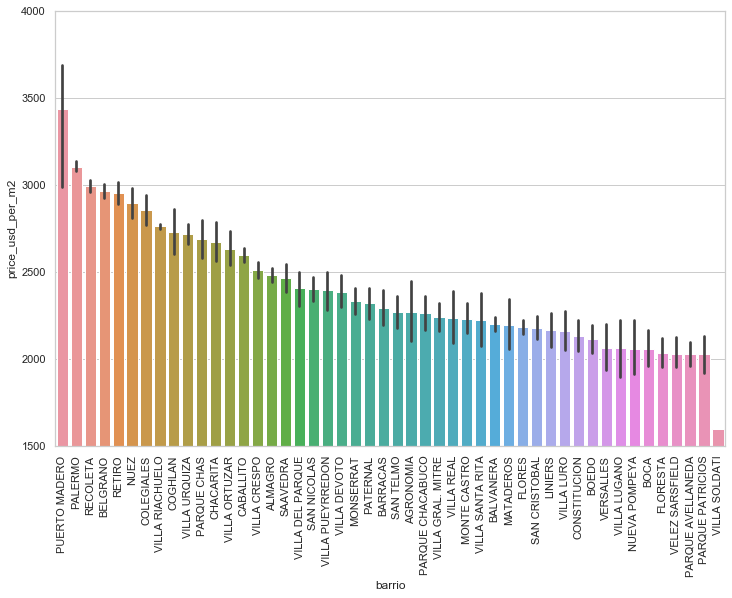

In [43]:
plt.xticks(rotation = 90)
ax.set_ylim(2500,4500) 
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios,data=df_filtered).set_ylim(1500,4000) ,;

In [45]:
total_propiedades_1 = df_filtered.groupby('barrio')['property_type'].count()
total_propiedades_1.sort_values()


barrio
VILLA SOLDATI           1
VILLA RIACHUELO         2
PUERTO MADERO           4
VILLA LUGANO           15
NUEVA POMPEYA          18
VILLA REAL             22
PARQUE AVELLANEDA      28
AGRONOMIA              31
VERSALLES              32
VILLA SANTA RITA       37
MATADEROS              39
PARQUE PATRICIOS       46
VELEZ SARSFIELD        52
PATERNAL               52
PARQUE CHAS            56
BOCA                   59
VILLA LURO             59
BOEDO                  62
MONTE CASTRO           66
COGHLAN                67
VILLA GRAL. MITRE      69
FLORESTA               70
VILLA PUEYRREDON       70
LINIERS                78
PARQUE CHACABUCO       84
BARRACAS               95
VILLA ORTUZAR          97
VILLA DEL PARQUE       99
CONSTITUCION           99
CHACARITA             102
SAN TELMO             108
SAN CRISTOBAL         111
VILLA DEVOTO          146
SAAVEDRA              156
MONSERRAT             169
COLEGIALES            175
NUEZ                  230
SAN NICOLAS           245
VILLA

In [46]:
df_filtered[df_filtered.barrio == 'PUERTO MADERO']

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
13141,2017-10-18,sell,apartment,|Argentina|Capital Federal|Puerto Madero|,"-34.6098446,-58.3662387",-34.609845,-58.366239,790000.0,218.0,200.0,3623.853211,NaN,4.0,NaN,https://www.properati.com.ar/1h1xa_venta_departamento_puerto-madero_suite_vestidor_vista_garage_subte-linea-d_subte-linea-a_tatana-latorre-lalong_cr9,PUERTO MADERO,1.0
13192,2017-11-03,sell,apartment,|Argentina|Capital Federal|Puerto Madero|,"-34.6021617,-58.3682467",-34.602162,-58.368247,850000.0,235.0,91.0,3617.021277,NaN,3.0,NaN,https://www.properati.com.ar/1hqyl_venta_departamento_puerto-madero_balcon_suite_terraza_vestidor_garage_subte-linea-d_subte-linea-b_subte-linea-a_ginevra-sothebys-international-realty,PUERTO MADERO,1.0
13316,2018-01-19,sell,apartment,|Argentina|Capital Federal|Puerto Madero|,"-34.6072692,-58.3665421",-34.607269,-58.366542,320000.0,115.0,64.0,2782.608696,NaN,3.0,NaN,https://www.properati.com.ar/1jsqw_venta_departamento_puerto-madero_suite_terraza_toilette_luminoso_lujoso_amenities_subte-linea-d_subte-linea-b_subte-linea-a_subte-linea-e_lismar-asoc,PUERTO MADERO,1.0
13340,2018-01-26,sell,apartment,|Argentina|Capital Federal|Puerto Madero|,"-34.6179496,-58.3657518",-34.617950,-58.365752,260000.0,70.0,65.0,3714.285714,NaN,2.0,NaN,https://www.properati.com.ar/1k487_venta_departamento_puerto-madero_balcon_luminoso_vista_garage_platinum-real-estate_dv2,PUERTO MADERO,1.0


In [47]:
df_filtered[df_filtered.barrio == 'VILLA SOLDATI']

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18963,2017-09-22,sell,apartment,|Argentina|Capital Federal|Villa Lugano|,"-34.662435,-58.466795",-34.662435,-58.466795,88000.0,55.0,55.0,1600.0,NaN,3.0,NaN,https://www.properati.com.ar/1fakt_venta_departamento_villa-lugano_balcon_luminoso_garage_impecable_apto-credito-hipotecario_gabriel-torres-inmobiliaria,VILLA SOLDATI,8.0


#### Más caros

In [48]:
table = pd.pivot_table(df_filtered, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,3434.442224
PALERMO,3104.273152
RECOLETA,2992.544294
BELGRANO,2966.662695
RETIRO,2954.140159


#### Más baratos

In [49]:
table = pd.pivot_table(df_filtered, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,1600.000000
PARQUE PATRICIOS,2027.830735
PARQUE AVELLANEDA,2027.910632
VELEZ SARSFIELD,2028.688869
FLORESTA,2035.022951


## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [50]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index


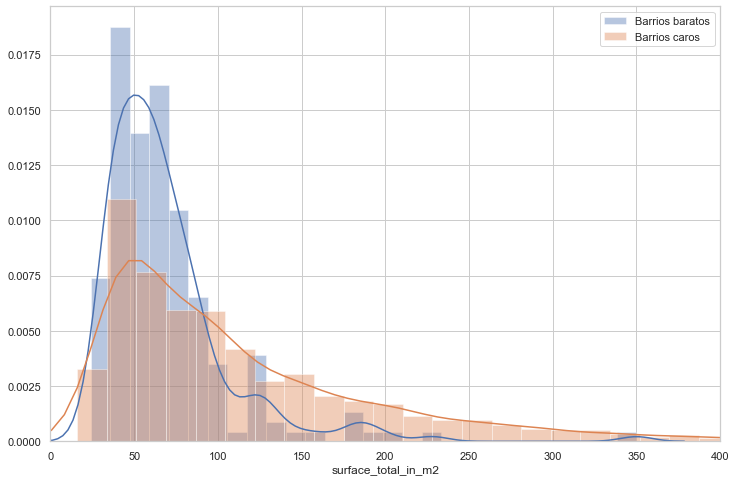

In [51]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

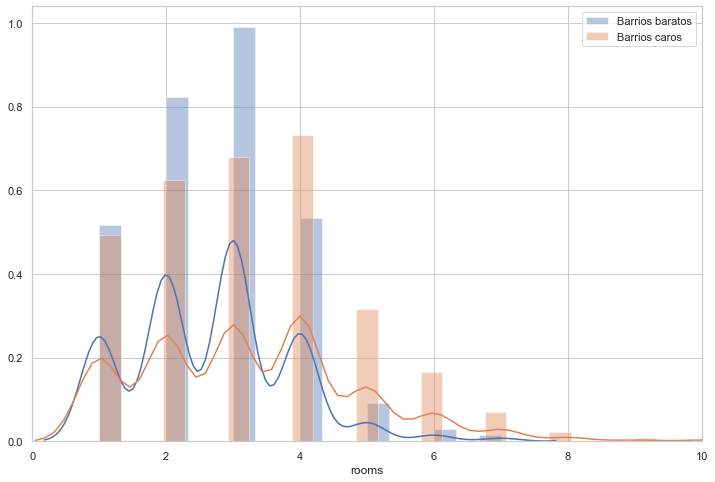

In [52]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

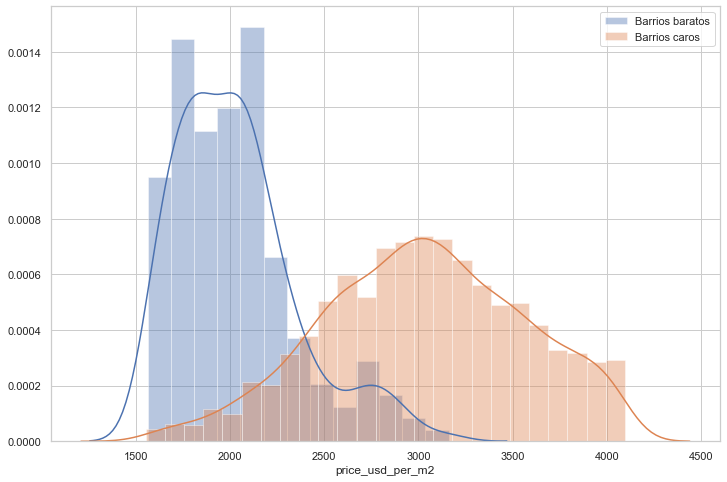

In [53]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [54]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|")))


18       5
22       6
24       6
29       5
35       6
        ..
18955    5
18956    5
18959    5
18960    5
18963    5
Name: place_with_parent_names, Length: 8417, dtype: int64

In [55]:
df_filtered.place_with_parent_names

18                         |Argentina|Capital Federal|Palermo|
22       |Argentina|Capital Federal|Palermo|Palermo Hollywood|
24       |Argentina|Capital Federal|Palermo|Palermo Hollywood|
29                         |Argentina|Capital Federal|Palermo|
35       |Argentina|Capital Federal|Palermo|Palermo Hollywood|
                                 ...                          
18955                |Argentina|Capital Federal|Villa Urquiza|
18956                    |Argentina|Capital Federal|Agronomía|
18959             |Argentina|Capital Federal|Villa Pueyrredón|
18960             |Argentina|Capital Federal|Villa Pueyrredón|
18963                 |Argentina|Capital Federal|Villa Lugano|
Name: place_with_parent_names, Length: 8417, dtype: object

<font color='green'> Nueva modificación en el data frame **df_filtered** que filtra solo las instancias donde existe el barrio (al menos hay 4 separadores |)  </font> 

Como algunos tienen 4 elementos, debemos quitarlos.

In [56]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.0,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
35,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5825677,-58.4329982",-34.582568,-58.432998,198000.0,64.0,48.0,3093.750000,NaN,2.0,NaN,https://www.properati.com.ar/1e4f0_venta_departamento_palermo-hollywood_balcon_terraza_luminoso_amenities_aire-acondicionado_arkis-inmobiliaria_eoh,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,2018-01-26,sell,apartment,|Argentina|Capital Federal|Villa Urquiza|,"-34.5869610349,-58.4991220286",-34.586961,-58.499122,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4up_venta_departamento_villa-urquiza_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0
18956,2018-01-26,sell,apartment,|Argentina|Capital Federal|Agronomía|,"-34.5857925673,-58.4991678032",-34.585793,-58.499168,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4uq_venta_departamento_agronomia_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0
18959,2018-01-29,sell,PH,|Argentina|Capital Federal|Villa Pueyrredón|,"-34.5848,-58.490567",-34.584800,-58.490567,289900.0,180.0,180.0,1610.555556,NaN,4.0,NaN,https://www.properati.com.ar/1k7w1_venta_ph_villa-pueyrredon_lavadero_parrilla_patio_quincho_terraza_luminoso_amoblado_impecable_placard_aire-acondicionado_re-max-premium-ii,VILLA PUEYRREDON,12.0
18960,2018-01-31,sell,apartment,|Argentina|Capital Federal|Villa Pueyrredón|,"-34.582448,-58.507942",-34.582448,-58.507942,115000.0,50.0,50.0,2300.000000,6.0,2.0,NaN,https://www.properati.com.ar/1kb1t_venta_departamento_villa-pueyrredon_luminoso_placard_re-max-lagos,VILLA PUEYRREDON,12.0


In [57]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_filtered[['barrio_publicado' , 'place_with_parent_names']]

,barrio_publicado,place_with_parent_names
18,PALERMO,|Argentina|Capital Federal|Palermo|
22,PALERMO,|Argentina|Capital Federal|Palermo|Palermo Hollywood|
24,PALERMO,|Argentina|Capital Federal|Palermo|Palermo Hollywood|
29,PALERMO,|Argentina|Capital Federal|Palermo|
35,PALERMO,|Argentina|Capital Federal|Palermo|Palermo Hollywood|
...,...,...
18955,VILLA URQUIZA,|Argentina|Capital Federal|Villa Urquiza|
18956,AGRONOMIA,|Argentina|Capital Federal|Agronomía|
18959,VILLA PUEYRREDON,|Argentina|Capital Federal|Villa Pueyrredón|
18960,VILLA PUEYRREDON,|Argentina|Capital Federal|Villa Pueyrredón|


Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde no coincidan para luego hacer el conteo por barrio.

In [58]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]
df_filtered_barrio_not_match[['barrio_publicado' , 'barrio']]

,barrio_publicado,barrio
40,BARRIO NORTE,PALERMO
42,NUNEZ,PALERMO
43,BELGRANO,PALERMO
71,BELGRANO,PALERMO
72,BELGRANO,PALERMO
...,...,...
18943,BELGRANO,VILLA PUEYRREDON
18948,VILLA DEVOTO,VILLA PUEYRREDON
18955,VILLA URQUIZA,VILLA PUEYRREDON
18956,AGRONOMIA,VILLA PUEYRREDON


Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [59]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.head(5)

barrio_publicado,ABASTO,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BARRIO NORTE,BELGRANO,BOCA,BOEDO,CABALLITO,CATALINAS,CENTRO / MICROCENTRO,CHACARITA,COGHLAN,COLEGIALES,CONGRESO,CONSTITUCION,FLORES,FLORESTA,LA PLATA,LAS CANITAS,LINIERS,MATADEROS,MONSERRAT,MONTE CASTRO,NUNEZ,ONCE,PALERMO,PARQUE CENTENARIO,PARQUE CHACABUCO,PARQUE CHAS,PARQUE PATRICIOS,PATERNAL,POMPEYA,PUERTO MADERO,RECOLETA,RETIRO,SAAVEDRA,SAN CRISTOBAL,SAN NICOLAS,SAN TELMO,TRES DE FEBRERO,TRIBUNALES,VERSALLES,VILLA CRESPO,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GENERAL MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA SANTA RITA,VILLA URQUIZA
barrio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AGRONOMIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,10,0,0
ALMAGRO,5,0,0,2,0,0,2,0,10,24,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,16,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0
BALVANERA,26,0,23,0,0,35,1,0,3,1,0,1,0,0,0,25,1,0,0,0,0,0,0,3,0,0,63,1,0,0,0,0,0,0,0,12,0,0,15,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
BARRACAS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
BELGRANO,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [60]:

table.idxmax(axis=1)

barrio
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                         CABALLITO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                             ALMAGRO
CABALLITO               PARQUE CENTENARIO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                         VERSALLES
MATADEROS                      VILLA LURO
MONSERRAT                       SAN TELMO
MONTE CASTRO                 VILLA DEVOTO
NUEVA POMPEYA            PARQUE PATRICIOS
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.

Lencina Guillermo